### 'Customer Churn Prediction'

Churn Prediction is a problem where we need to predict the probable customers that are likely to leave a service or to cancel a subscription to a service. 
It is very critical to the streaming businesses like Netflix, Amazon Prime, Spotify, Telecom Providers etc.

It also imposes the high significance because the cost of customer acquisition is more costly than retaining the customers.

So, the problem here to identify those customer who are risk of leaving so that a targeted marketing can be carried out

The dataset that I have taken is a Telco Dataset that is offered by IBM dataset and also available on openML.org

https://www.ibm.com/docs/en/cognos-analytics/11.1.0?topic=samples-telco-customer-churn

https://www.openml.org/search?type=data&status=active&id=42178

This problem is intended for the Business Owners as the users in order to enhance the customer retention.
The churn rate can be used as a health indicator for the businesses particular the businesses that are subscription based like Netflix, Spotify.

Many factors influence the reasons for a customer to Churn. It may be the fact that there’s a new competitor in the market offering better prices or maybe the service they are getting has not been up to the mark, so on and so forth.

So it is to find such patterns in the data given and see what facts are churned out in this problem

The Business questions this notebook aims to address are the following:

1. How many custumers churn? 
2. What is the impact on expected revenue?
3. What features are correlated to churn?
4. How well can a Model predict custumer churn?



The dataset named,'Telco-Customer-Churn' of csv format is downloaded from openML.org is uploaded here


In [1]:
#Importing the Necessary Libarary Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("Telco-Customer-Churn.csv")
print("Number of Samples in the dataset",dataset.shape[0])
print("Number of Features/Columns in the dataset",dataset.shape[1])
dataset.head()

Number of Samples in the dataset 7043
Number of Features/Columns in the dataset 21


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print("The features of the dataset are :",list(dataset.columns),"\n\n" )
dataset.info()

The features of the dataset are : ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'] 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecu

### 17 Categorical features:
    - CustomerID: Customer ID unique for each customer
    - gender: Whether the customer is a male or a female
    - SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
    - Partner: Whether the customer has a partner or not (Yes, No)
    - Dependent: Whether the customer has dependents or not (Yes, No)
    - PhoneService: Whether the customer has a phone service or not (Yes, No)
    - MultipeLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
    - InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
    - OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
    - OnlineBackup: Whether the customer has an online backup or not (Yes, No, No internet service)
    - DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
    - TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
    - StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
    - StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
    - Contract: The contract term of the customer (Month-to-month, One year, Two years)
    - PaperlessBilling: The contract term of the customer (Month-to-month, One year, Two years)
    - PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card
    
  
### 3 Numerical features:

    - Tenure: Number of months the customer has stayed with the company 
    - MonthlyCharges: The amount charged to the customer monthly
    - TotalCharges: The total amount charged to the customer
      
### Target feature:
    - Churn: Whether the customer is a churned or not (Yes or No)
    
  

#### Checking for the duplicate records

In [4]:
#Checking if any duplicate samples present
if len(pd.unique(dataset['customerID'])) == dataset.shape[0]:
    print("No Duplicate Records Found")

No Duplicate Records Found


#### Converting the columns that are numerical but are stored as string objects

We have a column 'TotalCharges' which is a numerical in nature but stored as object as observed in the above cell

In [5]:
#Converting the required features into a numeric datatype
dataset['TotalCharges']=pd.to_numeric(dataset['TotalCharges'],errors="coerce")
#the parameter 'coerce' will fill Nan Values if there is no valid numerical value

#### Handling Missing Values
Checking for the NaN values in the data Set

In [6]:
#Number of Missing Values columnwsie
dataset.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

It is observed TotalCharges has 11 Missing Values and the rows are filtered to note if the values can be imputed.
As there are other columns 'Tenure' indicating number of months and also a column named 'MonthlyCharges', lets see if the total charges can be imputed from those two columns

In [7]:
dataset[dataset['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


As observed in the above result, all the NaN values rows have tenure value as Zero. So it cannot be imputed through mentioned column values.
Thereby, those values are imputed by median of the TotalCharges Column.

In [8]:
#Imputing the NaN values of the updated dataset using the other columns - tenure and MonthlyCharges
dataset['TotalCharges'].fillna(dataset['TotalCharges'].median(),inplace=True)

#### Effect of Churners on the Business

Lets see the distribution of Churners and Non-Churners in the dataset and there potential loss in revenue per month to the business due to migration of churners

The Churn-Rate in percent is:
26.54
No of Non-Churners= 5174
No of Churners= 1869


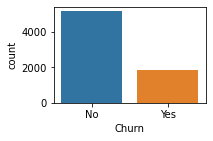

In [9]:
#How many churners are in the dataset?
plt.figure(figsize=(6, 6))
plt.subplot(3, 2, 2)
sns.countplot(x='Churn',data=dataset,)
print("The Churn-Rate in percent is:" )
print(round((dataset['Churn'].value_counts()[1] / dataset['Churn'].count() * 100),2))
print("No of Non-Churners=",dataset['Churn'].value_counts()[0])
print("No of Churners=",dataset['Churn'].value_counts()[1])

In [10]:
# Probable Loss to the company in percentage due to churners
print("The Loss to the organization monthly due to churners is ",
      round((dataset[dataset['Churn']=="Yes"]['MonthlyCharges'].sum() / dataset['MonthlyCharges'].sum())*100,2))


The Loss to the organization monthly due to churners is  30.5


#### Expenses vs Churning

Text(0.5, 0, 'TotalCharges')

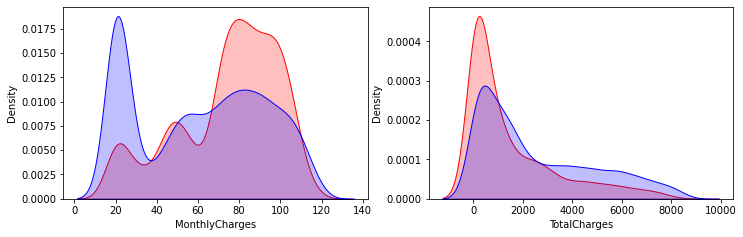

In [12]:
plt.figure(figsize=(12, 12))
plt.subplot(3,2,1)
sns.kdeplot(dataset.loc[(dataset['Churn']=='Yes'),
            'MonthlyCharges'], color='r', shade=True, label='Churn=Yes')
  
sns.kdeplot(dataset.loc[(dataset['Churn']=='No'), 
            'MonthlyCharges'], color='b', shade=True, label='Churn=No')
  
plt.xlabel('MonthlyCharges')
plt.subplot(3,2,2)
sns.kdeplot(dataset.loc[(dataset['Churn']=='Yes'),
            'TotalCharges'], color='r', shade=True, label='Churn=Yes')
  
sns.kdeplot(dataset.loc[(dataset['Churn']=='No'), 
            'TotalCharges'], color='b', shade=True, label='Churn=No')
  
plt.xlabel('TotalCharges')

The density of total charges for churning customers are high around 0. As many customers cancel the subsription in 1-2 months.

The customers paying high monthly fees have a high probability of churning.

C:\Users\Chandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chandu\anaconda3\li

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

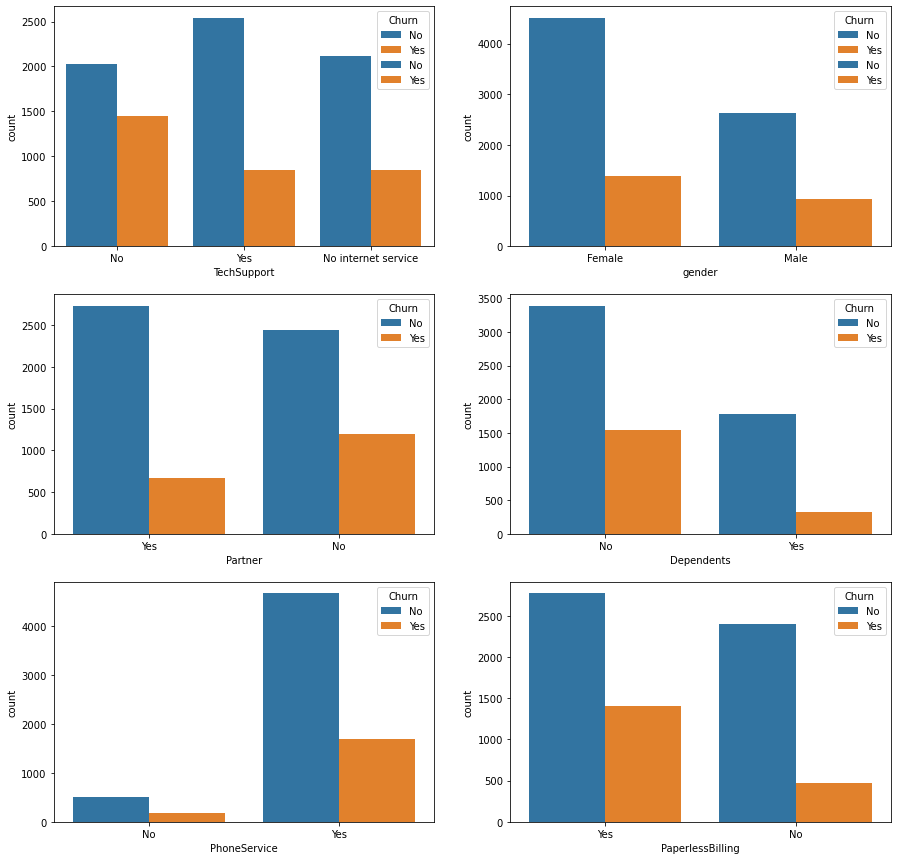

In [13]:
#looking at some more Variabels
plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
sns.countplot('MultipleLines',hue="Churn", data=dataset)

plt.subplot(3, 2, 1)
sns.countplot('TechSupport', hue='Churn', data=dataset)

plt.subplot(3, 2, 2)
sns.countplot('SeniorCitizen', hue='Churn', data=dataset)

plt.subplot(3, 2, 2)
sns.countplot('gender', hue='Churn', data=dataset)

plt.subplot(3, 2, 3)
sns.countplot('Partner', hue='Churn', data=dataset)

plt.subplot(3, 2, 4)
sns.countplot('Dependents', hue='Churn', data=dataset)

plt.subplot(3, 2, 5)
sns.countplot('PhoneService', hue='Churn', data=dataset)

plt.subplot(3, 2, 6)
sns.countplot('PaperlessBilling', hue='Churn', data=dataset)

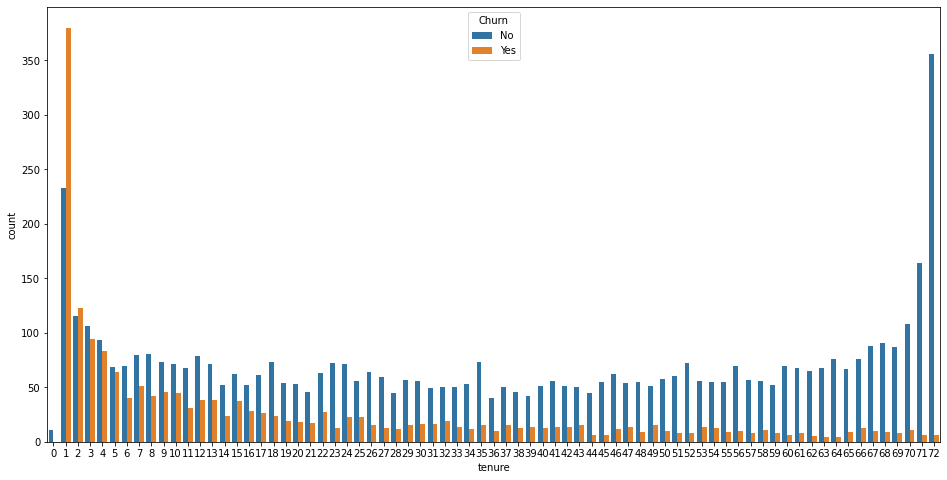

In [14]:
plt.figure(figsize=(16,8))
sns.countplot(x="tenure", hue="Churn", data=dataset)
plt.show()

It is noted that the higher the tenure, the lesser the churn rate.
It indicates that the probability of customer churning out reduces as the tenure increases

C:\Users\Chandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


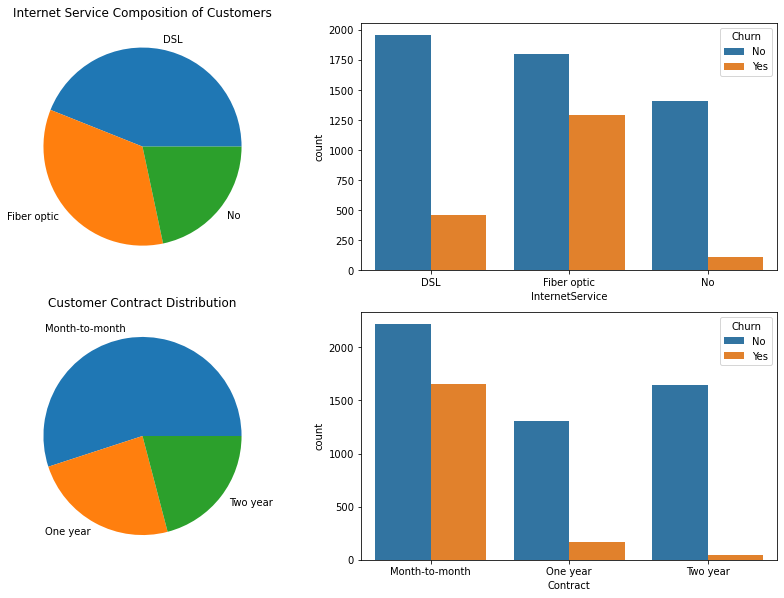

In [16]:
plt.figure(figsize=(12, 12))
plt.subplot(3, 2, 1)  # row 1, column 2, count 1
plt.pie(dataset['InternetService'].value_counts(),labels=dataset['InternetService'].unique())
plt.title('Internet Service Composition of Customers')
 
# using subplot function and creating plot two
# row 1, column 2, count 2
plt.subplot(3, 2, 2)
 
sns.countplot('InternetService', hue='Churn', data=dataset,linewidth=5)

plt.tight_layout()
# show plot
plt.subplot(3, 2, 3)  # row 1, column 2, count 1
plt.pie(dataset['Contract'].value_counts(),labels=dataset['Contract'].unique())
plt.title('Customer Contract Distribution')
 
# using subplot function and creating plot two
# row 1, column 2, count 2
plt.subplot(3, 2, 4)
 
sns.countplot('Contract', hue='Churn', data=dataset,linewidth=5)

plt.tight_layout()
# show plot
plt.show()
plt.show()

Fiber Optic Internet Customers churn at significantly proportions than DSL or No Internet customers

More than half of customers use a monthly payment option.Significantly more customers churn on monthly plans
The longer the plan, the lower the churn rate

In [17]:
print(dataset.apply(lambda col: len(col.unique())))

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [18]:
non_discrete=['customerID','tenure','MonthlyCharges','TotalCharges']
discrete_cols=[ele for ele in list(dataset.columns) if ele not in non_discrete]
print("The categorical features are ",discrete_cols)

The categorical features are  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [19]:
#Encoding the Categorical Features
df=dataset.drop(["customerID"],axis=1)
df['gender']=df["gender"].map({'Male':1,'Female':0})
for col in ['Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']:
    df[col]=df[col].map({'Yes':1,'No':0})
for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','MultipleLines']:
    df[col]=df[col].map({'Yes':1,'No':0,'No internet service':0,'No phone service':0})
#Encoding the other category features with more than Two Category Values
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,84.80,1990.50,0,0,0,1,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,103.20,7362.90,0,1,0,1,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,29.60,346.45,0,0,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,74.40,306.60,1,1,0,0,0,0,0,1


<AxesSubplot:>

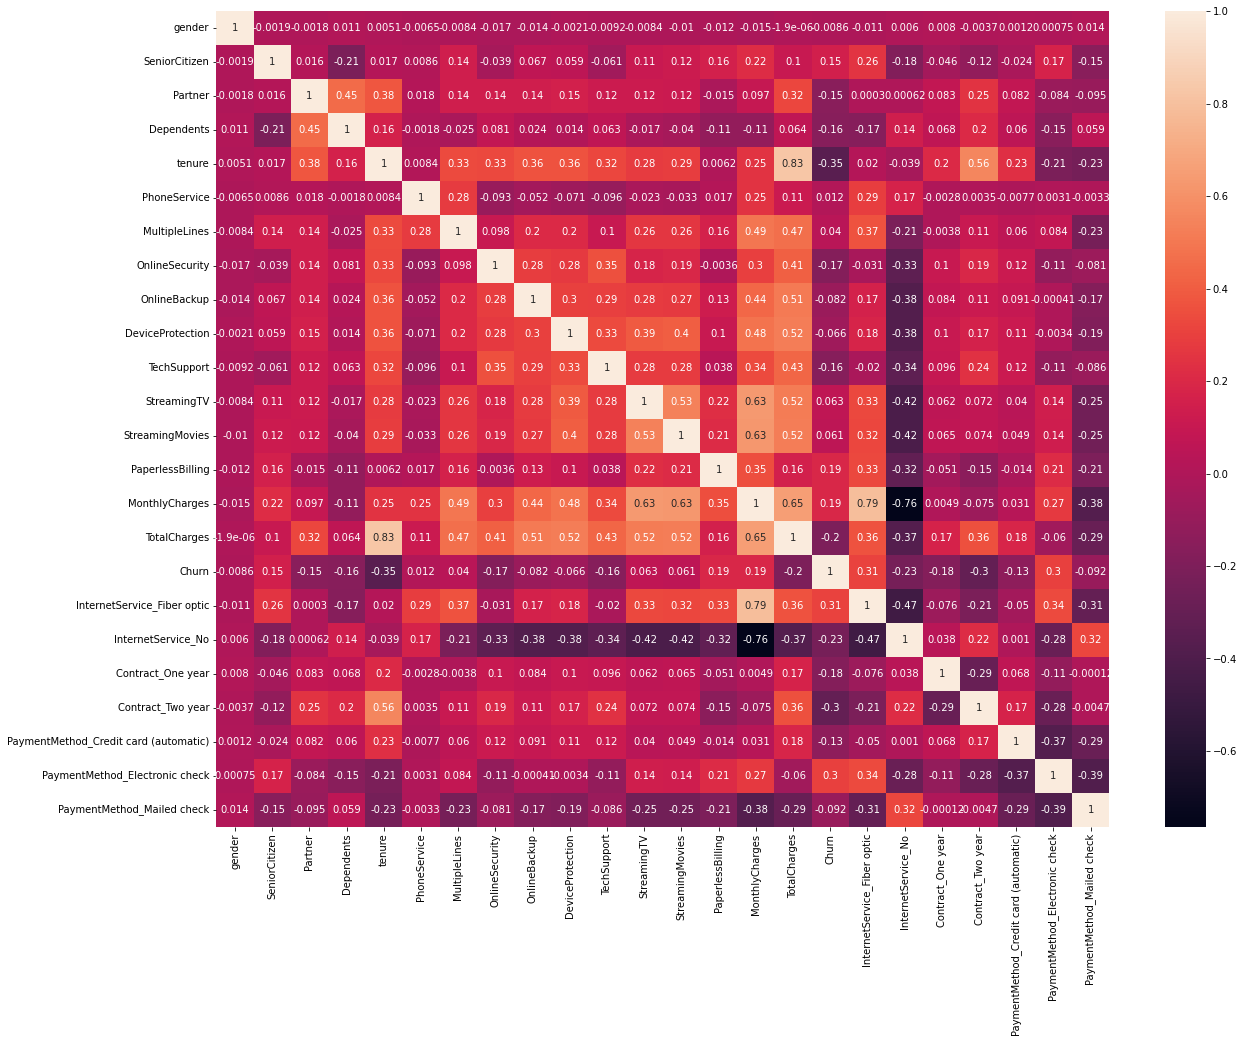

In [20]:
#Correlation Analysis
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

#### The variables correlating with  the target feature 'Churn'

<AxesSubplot:>

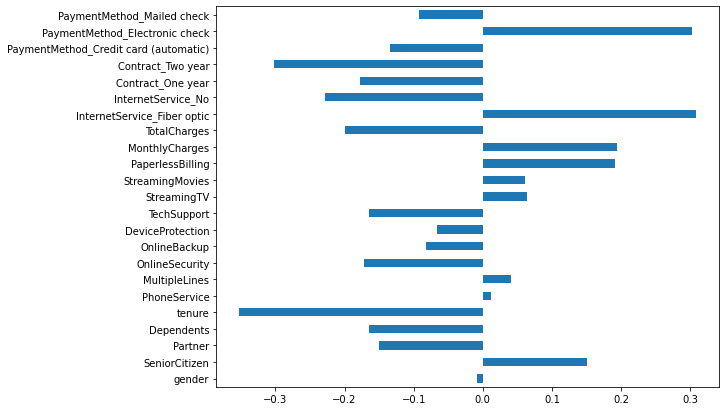

In [21]:
df.drop('Churn', axis=1).corrwith(df['Churn']).plot(kind='barh', figsize=(9,7))

### Modelling
The problem is to predict the possibility of a customer churning out or not
Thereby it is a Classfication Problem and thereby, we hereby going to test the dataset with potential algorithms
Logistic Regression, RandomForestClassifier, DecisionTreeClassifier and Naive Bayes Classifier

And to determine the performance of the chosen algorithms, the metrics method are also imported

As the dataset more imbalanced dataset due the kind of the problem ,we are using the K-Cross validation to get the mean accuracy in order to make sure that all kind of categories are tested uniformily.
For which, StratifiedKFold method is imported

In [22]:
# Import Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Import metric for performance evaluation
from sklearn.metrics import accuracy_score, classification_report,roc_auc_score,roc_curve,confusion_matrix

from sklearn.model_selection import StratifiedKFold

In [23]:
features=df.drop(['Churn'],axis=1)#All the columns are selected as the features for the classification
target=df['Churn']

### Random Forest Classifier

In [24]:
# Split the data using StratifiedKFold and get the average Accuracy score
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)#5-cross validation
mean_f1 = 0
for train_ix, test_ix in skf.split(features, target):
    X_train, X_test = features.iloc[train_ix], features.iloc[test_ix]
    y_train, y_test = target.iloc[train_ix], target.iloc[test_ix]
    rf_clf = RandomForestClassifier()
    rf_clf.fit(X_train, y_train)
    predictions = rf_clf.predict(X_test)
    mean_f1 += accuracy_score(y_test, predictions)
    
print(f'Mean Accuracy Score: {mean_f1 / skf.n_splits}')

Mean Accuracy Score: 0.7927011420091619


### Logistic Regression

In [25]:
# Split the data using StratifiedKFold and get the average Accuracy score
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
mean_f1 = 0
for train_ix, test_ix in skf.split(features, target):
    X_train, X_test = features.iloc[train_ix], features.iloc[test_ix]
    y_train, y_test = target.iloc[train_ix], target.iloc[test_ix]
    lr_clf = LogisticRegression(solver='liblinear',max_iter=500)
    lr_clf.fit(X_train, y_train)
    predictions = lr_clf.predict(X_test)
    mean_f1 += accuracy_score(y_test, predictions)   
print(f'Mean Accuracy Score: {mean_f1 / skf.n_splits}')

Mean Accuracy Score: 0.8026405937479837


### Naive Bayes Classifier

In [26]:
# Split the data using StratifiedKFold and get the average Accuracy score
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
mean_f1 = 0
for train_ix, test_ix in skf.split(features, target):
    X_train, X_test = features.iloc[train_ix], features.iloc[test_ix]
    y_train, y_test = target.iloc[train_ix], target.iloc[test_ix]
    NB_clf = GaussianNB()
    NB_clf.fit(X_train, y_train)
    predictions = NB_clf.predict(X_test)
    mean_f1 += accuracy_score(y_test, predictions)
    #print(f'Accuracry Score :{accuracy_score(y_test,predictions)}')
    
print(f'Mean Accuracy Score: {mean_f1 / skf.n_splits}')

Mean Accuracy Score: 0.7505330989096072


### Decision Tree Classifier

In [27]:
# Split the data using StratifiedKFold and get the average Accuracy score
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
mean_f1 = 0
for train_ix, test_ix in skf.split(features, target):
    X_train, X_test = features.iloc[train_ix], features.iloc[test_ix]
    y_train, y_test = target.iloc[train_ix], target.iloc[test_ix]
    dt_clf = DecisionTreeClassifier()
    dt_clf.fit(X_train, y_train)
    predictions = dt_clf.predict(X_test)
    mean_f1 += accuracy_score(y_test, predictions)
    
print(f'Mean Accuracy Score: {mean_f1 / skf.n_splits}')

Mean Accuracy Score: 0.7330700771017484


From the above cell, the Two algorithm that seems to be close in terms of accuracy score and relatively better are 'Random Forest Classifier' and 'Logistic Classifier'.

So, lets explore both the algorithm little more.

The intuition here to find the best train and test dataset in a k-fold yielding the maximum performance and idenfying the importance of the features in the same

#### Random Forest Classifier - detailed

RandomForestClassifier()

 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1035
           1       0.67      0.45      0.54       374

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.70      1409
weighted avg       0.78      0.80      0.78      1409

Accuracy   Score :  0.7955997161107168
Area under curve :  0.8301958200935182 



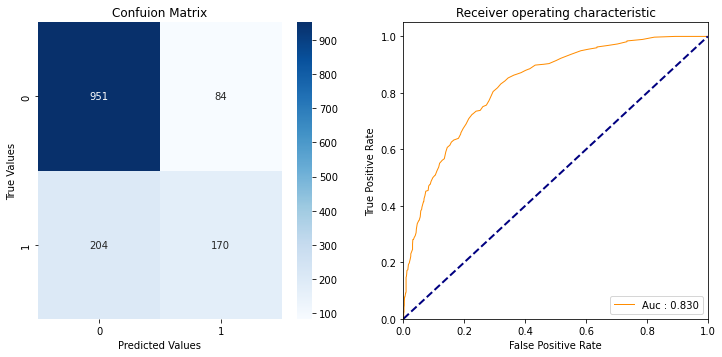

In [28]:
# Split the data using StratifiedKFold and get the average Accuracy score
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)#5-cross validation
mean_f1 = 0
max_score=0
for train_ix, test_ix in skf.split(features, target):#for each set of train,test in k-cross validation
    X_train, X_test = features.iloc[train_ix], features.iloc[test_ix]
    y_train, y_test = target.iloc[train_ix], target.iloc[test_ix]
    rf_clf = RandomForestClassifier()#creating RandomForest Classifier
    rf_clf.fit(X_train, y_train)#fitting the model
    predictions = rf_clf.predict(X_test)#predicting the test dataset with model
    accuracy=accuracy_score(y_test, predictions)#finding the accuracy score
    mean_f1 += accuracy_score(y_test, predictions)
    if accuracy>max_score:
        best_x_train,best_x_test=X_train,X_test#finding the train & test datasets with the maximum accuracy
        best_y_train,best_y_test=y_train,y_test
        max_score=accuracy
        
training_x,testing_x=best_x_train,best_x_test#finding the metrics for the train & test with maxim accuract
training_y,testing_y=best_y_train,best_y_test
rf_clf.fit(training_x,training_y)
predictions = rf_clf.predict(testing_x)
probabilities = rf_clf.predict_proba(testing_x)[:,1]

      
print (rf_clf)
print ("\n Classification report : \n",classification_report(testing_y,predictions))
print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    
#confusion matrix
#plotting for the confusion matrix
conf_matrix = confusion_matrix(testing_y,predictions)
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='Blues')
plt.title('Confuion Matrix')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
    
#roc_auc_score
model_roc_auc = roc_auc_score(testing_y,probabilities) 
print ("Area under curve : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(testing_y,probabilities)
    
plt.subplot(222)
plt.plot(fpr, tpr, color='darkorange', lw=1, label = "Auc : %.3f" %model_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Logistic Classifier - detailed

LogisticRegression(max_iter=500, solver='liblinear')

 Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1035
           1       0.68      0.59      0.63       373

    accuracy                           0.82      1408
   macro avg       0.77      0.74      0.75      1408
weighted avg       0.81      0.82      0.81      1408

Accuracy   Score :  0.8174715909090909
Area under curve :  0.8576277991477899 



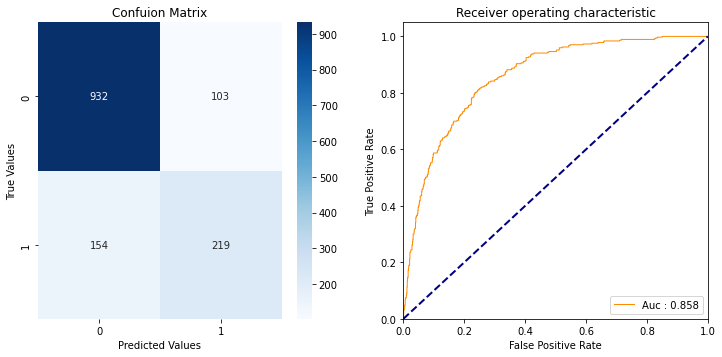

In [29]:
# Split the data using StratifiedKFold and get the average Accuracy score
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
mean_f1 = 0
max_score=0
for train_ix, test_ix in skf.split(features, target):
    X_train, X_test = features.iloc[train_ix], features.iloc[test_ix]
    y_train, y_test = target.iloc[train_ix], target.iloc[test_ix]
    lr_clf = LogisticRegression(solver="liblinear",max_iter=500)
    lr_clf.fit(X_train, y_train)
    predictions = lr_clf.predict(X_test)
    accuracy=accuracy_score(y_test, predictions)
    mean_f1 += accuracy_score(y_test, predictions)
    if accuracy>max_score:
        best_x_train,best_x_test=X_train,X_test
        best_y_train,best_y_test=y_train,y_test
        max_score=accuracy
        
training_x,testing_x=best_x_train,best_x_test
training_y,testing_y=best_y_train,best_y_test
lr_clf.fit(training_x,training_y)
predictions = lr_clf.predict(testing_x)
probabilities = lr_clf.predict_proba(testing_x)[:,1]

      
print (lr_clf)
print ("\n Classification report : \n",classification_report(testing_y,predictions))
print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    
#confusion matrix
conf_matrix = confusion_matrix(testing_y,predictions)
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='Blues')
plt.title('Confuion Matrix')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
    
#roc_auc_score
model_roc_auc = roc_auc_score(testing_y,probabilities) 
print ("Area under curve : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(testing_y,probabilities)
    
plt.subplot(222)
plt.plot(fpr, tpr, color='darkorange', lw=1, label = "Auc : %.3f" %model_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

<AxesSubplot:title={'center':'Feature Importances for Random Forest Classifier Model'}>

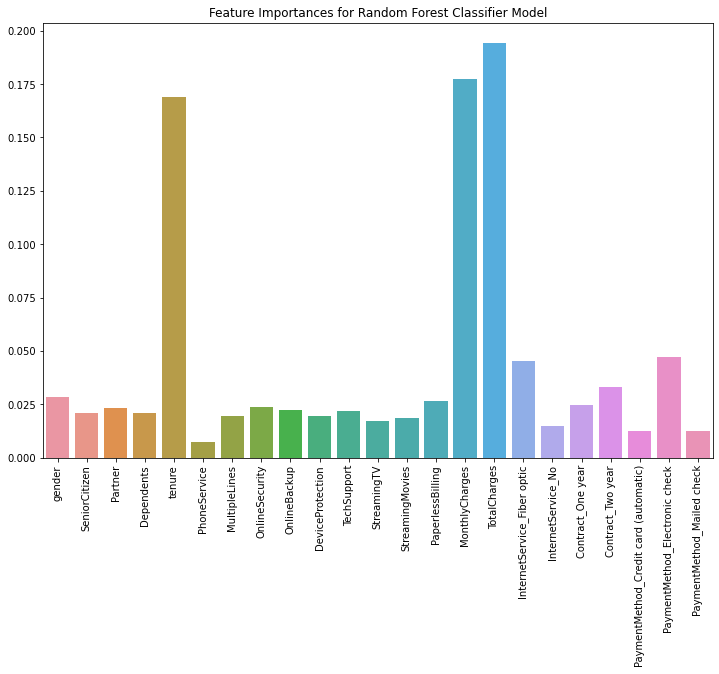

In [30]:
plt.figure(figsize=(12,8))
plt.title('Feature Importances for Random Forest Classifier Model')
plt.xticks(rotation="vertical")
importance = rf_clf.feature_importances_
sns.barplot(x=features.columns,y=importance)


<AxesSubplot:title={'center':'Feature Importances for Logistic Regression Classifier Model'}>

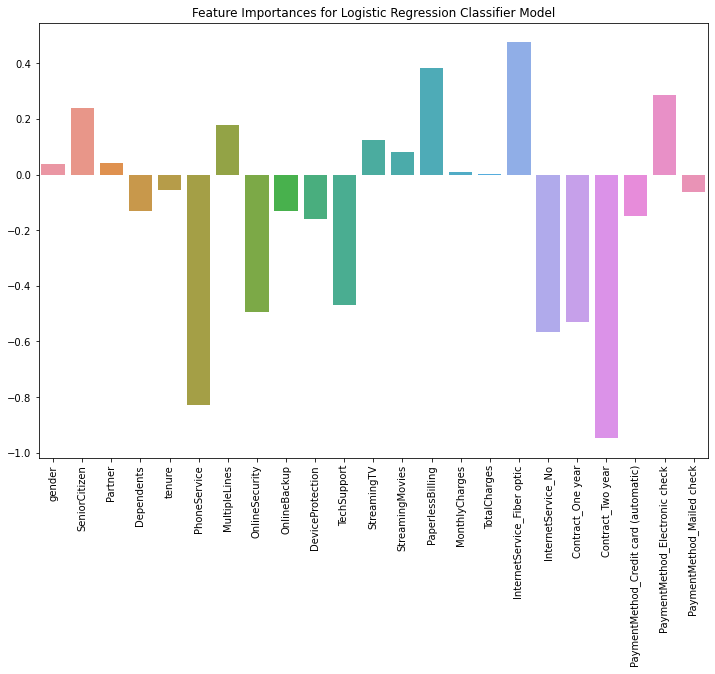

In [31]:
plt.figure(figsize=(12,8))
plt.title('Feature Importances for Logistic Regression Classifier Model')
plt.xticks(rotation="vertical")
importance = lr_clf.coef_[0]
sns.barplot(x=features.columns,y=importance)



# Customer Churn Prediction

Churn prediction is one of the most popular Big Data use cases in business. It consists of detecting customers who are likely to cancel a subscription to a service.Although originally a telcom giant thing, this concerns businesses of all sizes, including startups.

Churn Prediction Model is a predictive model that calculates, on an individual customer basis, the likelihood (or susceptibility) that a customer will stop doing business with the company.It’s a binary classifier, which means that it divides customers into two distinct groups (classes) based on whether or not they leave the company.

The data is sourced from IBM/openML portal which represents the customer information of a telecom company. The data is composed of both numerical and categorical features. 
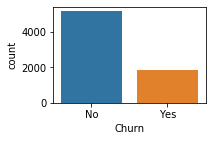

### Insights from the Dataset
The EDA on the dataset showed that the features like Monthly Charges, Tenure, Contract Type, InternetService has more effect on the customer to churn.
 
- The possibility of customer churning out decreases as the tenure period of the cusomer increases
- The numbef of customers having monthly charges greater than 60 are possible to churn
- Majority of churners are leaving in the first two months
- Fiber Optic Internet Customers churn at significantly proportions than DSL or No Internet customers
- Significantly more customers churn on monthly plans. The longer the plan, the lower the churn rate
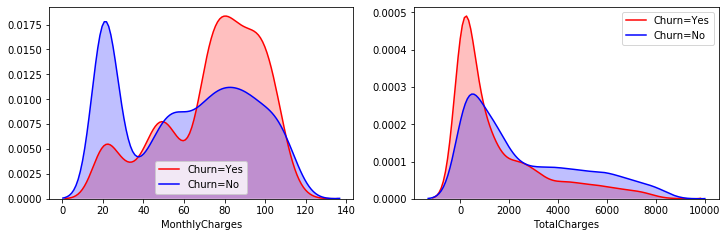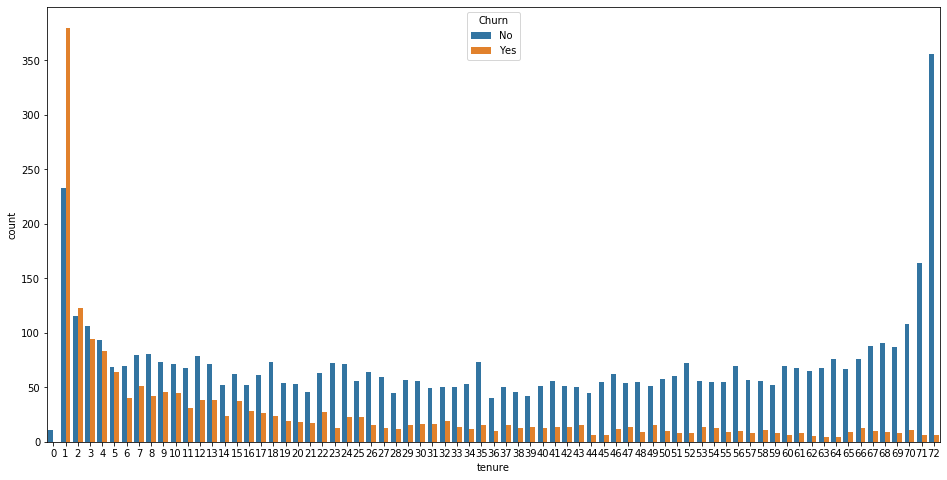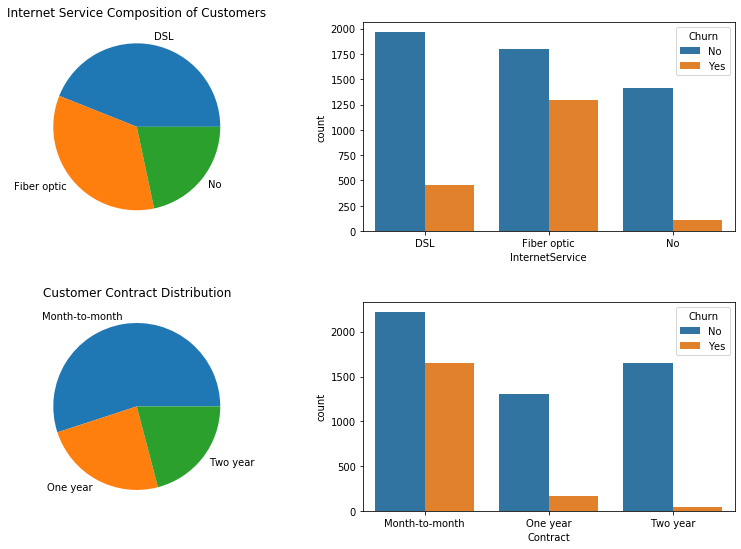


### Modelling

As defined, the churn prediction is a classification model where we need to label a customer either Churn or Non-Churner.
Various classification algorithms are applied on the dataset. The Random Forest Classifier and Logistic Regression Classifiers are relatively better algorithms giving aroung 80% of accuracy in the predictions.
The importance of the features in both the models is presented below.

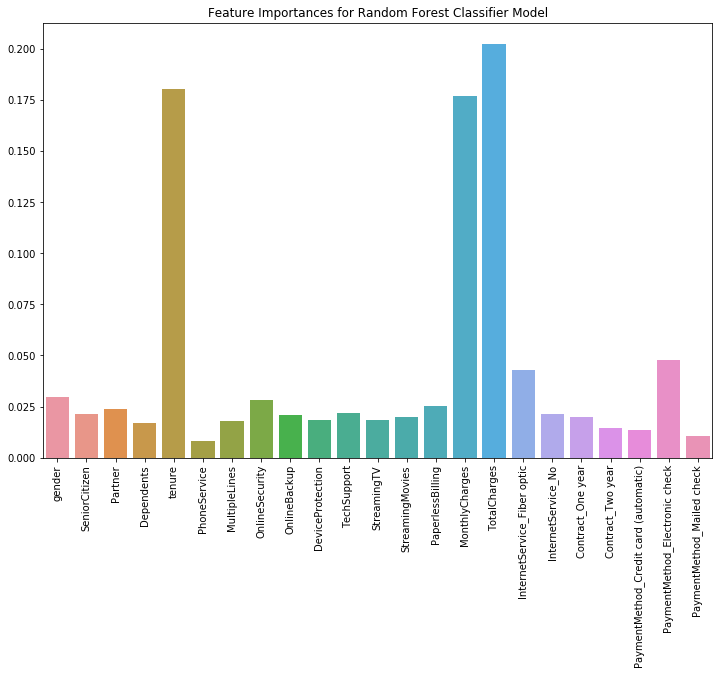 | 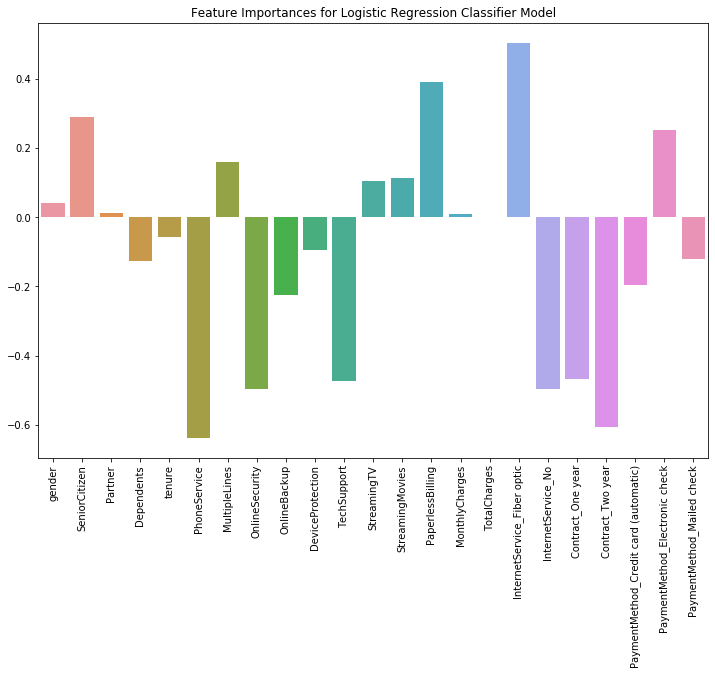





# Final Step: Connect your workflow/process to the DSA-Project Life Cycle
- List and briefly discuss how important details from each stage of the [DSA-PLC](../../module1/resources/DSA-ProjectLifecycle-slidedeck.pdf) played a role in your story development.
- Use markdown to provide this overview below:
<hr/>

<h1 align="center"><u>DSA-Project Life Cycle Discussion</u></h1>



1. **Problem Definition, Requirements & Expectations:**
The problem of customer churn prediction seemed interesting and considered as one of the challenges in the current businesses. However, gaining the knowledge about the dataset and understanding the each feature and its effect on the telecom business was challenging to me as I have no prior knowledge about the telecom business.After a little exploration, defining the questions for the EDA considering the different combination of columns is yet another difficulty I had during this step. 
2. **Data Acquisition & Curation**
The dataset I have taken is available on the different platforms like kaggle, openMl.org, IBM.However, I wanted to work on the authentic data in order to enhance the learning and gain an exposure on realtime business. However, I believe as the data is ackowledge by the organization like IBM, it is well curated to be worked on.
3. **Data Shaping & Carpentry**
The data carpentry is difficult and tedious stage of all. Fortunately, there are very minimal missing values in the dataset and the missing values are imputed using the median statistic metric. However, the more efforts are made while dealing with the categorical features which had string values and an additional columns are added to the data while converting them into numerical categories due to the constraints of Python Programming language.
4. **Explanatory Data Analysis & Visualization**
This stage has consumed most of my time on the project and stimulating the correlation between the different combinations of features is hedious.It was made more tedious when overall features to work on are greater than 20. It made me to difficult to understand how different combination of features are effecting the target feature.Through visualizations and little exploration, a lot of clarity is conceived about the different the features.
5. **Machine Learning Model Planning, Building and testing**
I was spectical about this stage as I was working with very imbalanced dataset and I was worried that it will effect the performance of the models. This challenge made me to explore more about the available techniques to handle the imbalanced data. One of such techniques is to use k-cross validation and I have used k-cross validation throuh the avaliable 'stratifiedkfold' module from scikit learn. I have tested the dataset with 5 splits and 4 different classification algorithms namely, Random Forest Classifier, Logistic Regression Classifier, Naive Bayes Classifier, Decision Tree Classifier.
6. **ML model validation, visualization, and interpretation**
The accuracy of the Random Forest and Logistic Regression are relatively better to the algorithm. But when I tried to study the importance of the features in  both the models, there is lot of difference between the models. Each of it have given the different importances to the features which made me to recheck the entire process twice. After deliberation, I understood the working algorithmic principles of the both the models are indeed different.
7. **Story Development and reporting**
I believe the required elements for telling the targeted auidence for this problem are well acquired in EDA stage of the problem itself. The different features that showed correlation to the target feature are somewhat supported by the machinelearning models.Thereby all the required visual charts and plots are filtered to explain the findings.